In [66]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
from collections import defaultdict




In [44]:
# read the dataset
df = pd.read_csv('survey_results_public.csv')

df_schema = pd.read_csv('survey_results_schema.csv')

# Exploring the Dataset

In [45]:
df.shape

(51392, 154)

In [46]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.isnull().sum()

Respondent                         0
Professional                       0
ProgramHobby                       0
Country                            0
University                         0
EmploymentStatus                   0
FormalEducation                    0
MajorUndergrad                  8551
HomeRemote                      7384
CompanySize                    12470
CompanyType                    12569
YearsProgram                     247
YearsCodedJob                  10502
YearsCodedJobPast              50418
DeveloperType                  15267
WebDeveloperType               40696
MobileDeveloperType            49839
NonDeveloperType               46502
CareerSatisfaction              8697
JobSatisfaction                11016
ExCoderReturn                  50469
ExCoderNotForMe                50471
ExCoderBalance                 50469
ExCoder10Years                 50475
ExCoderBelonged                50464
ExCoderSkills                  50457
ExCoderWillNotCode             50470
E

In [48]:
df_schema.set_index('Column', inplace=True)

In [49]:
df_schema.loc['Professional']

Question    Which of the following best describes you?
Name: Professional, dtype: object

In [50]:
# find columns with more than %35 missing values
#missing_cols = list(df.columns[df.isnull().mean() > 0.35])

In [51]:
df.Country.value_counts()

United States                     11455
India                              5197
United Kingdom                     4395
Germany                            4143
Canada                             2233
France                             1740
Poland                             1290
Australia                           913
Russian Federation                  873
Spain                               864
Netherlands                         855
Italy                               781
Brazil                              777
Sweden                              611
Switzerland                         595
Israel                              575
Romania                             561
Iran                                507
Austria                             477
Pakistan                            454
Czech Republic                      411
Belgium                             404
South Africa                        380
Turkey                              363
Ukraine                             356


In [52]:
df.CompanySize.value_counts()

20 to 99 employees          8587
100 to 499 employees        7274
10,000 or more employees    5680
10 to 19 employees          4103
1,000 to 4,999 employees    3831
Fewer than 10 employees     3807
500 to 999 employees        2486
5,000 to 9,999 employees    1604
I don't know                 869
I prefer not to answer       681
Name: CompanySize, dtype: int64

In [53]:
df.CompanyType.value_counts()

Privately-held limited company, not in startup mode                      16709
Publicly-traded corporation                                               5871
I don't know                                                              3233
Sole proprietorship or partnership, not in startup mode                   2831
Government agency or public school/university                             2451
Venture-funded startup                                                    2387
I prefer not to answer                                                    1816
Pre-series A startup                                                      1288
Non-profit/non-governmental organization or private school/university     1225
State-owned company                                                        670
Something else                                                             342
Name: CompanyType, dtype: int64

In [54]:
df.CollaborateRemote.value_counts()

Somewhat agree       8983
Agree                8784
Disagree             6436
Strongly agree       3519
Strongly disagree    1735
Name: CollaborateRemote, dtype: int64

### Q1. Which developer types does each university produce?
University, CompanyType, DeveloperType, SelfTaughtTypes, EducationTypes
### Q2. How often do university students work from home?
University, HomeRemote
### Q3. How hard is it to collaborate remotly?
CollaborateRemote

# Preproecessing Dataset

In [55]:
df.shape

(51392, 154)

which country should we build the company at? Country
what should the company type and size be? CompanySize & CompanyType
Who would we hire? University & ProgramHobby

In [56]:
# drop columns which has more than %35 NaN's
#df = df.drop(columns = missing_cols)

In [57]:
df.columns

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)

In [58]:
df.MajorUndergrad.value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

In [59]:
# This code is obtained from udacity lesson
def get_description(column_name, schema=df_schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    return desc


## Handle missing values

In [60]:
df.isnull().sum().sum()

3586951

In [61]:
df = df.fillna('None')

In [62]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,None,None,None,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,None,None
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,None,37500
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750,None
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,None,None
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,None,None,None,None,None,None,None,None,None,None


## Q1. What programming language is mostly used by developers?

In [82]:
def split_value(df, col_name, separator):
    '''
    INPUT - df  -  dataframe -  original dataframe
            col_name - string - column name to split the values
            separator - string - split using this seprator
    OUTPUT - 
            df - pandas dataframe - all value for the column of original dataframe
    '''
    df = pd.DataFrame(df[col_name].dropna().str.split(separator).tolist()).stack()
    return df


In [114]:
split_worked_language = split_value(df, 'HaveWorkedLanguage','; ')


In [117]:
split_worked_language = split_worked_language.value_counts()

In [152]:
split_worked_language.head(20)

JavaScript     22875
SQL            18754
None           14767
Java           14524
C#             12476
Python         11704
PHP            10290
C++             8155
C               6974
TypeScript      3488
Ruby            3324
Swift           2368
Objective-C     2349
VB.NET          2273
Assembly        1823
R               1634
Perl            1585
VBA             1574
Matlab          1569
Go              1557
dtype: int64

Text(0.5, 1.0, 'Programming language usage at work')

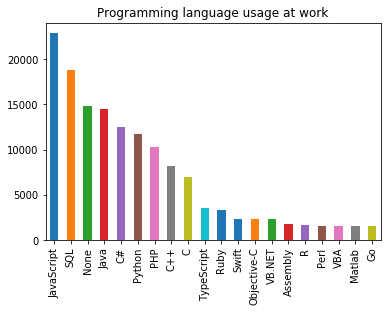

In [146]:
split_worked_language.head(20).plot(kind='bar')

plt.title('Programming language usage at work')

In [153]:
split_wanted_language = split_value(df, 'WantWorkLanguage','; ')
split_wanted_language = split_wanted_language.value_counts()
split_wanted_language.head(20)

None           17621
JavaScript     16327
Python         12570
SQL            11217
C#             10187
Java            9988
C++             7647
Go              5770
TypeScript      5692
PHP             5365
C               4841
Swift           4530
Ruby            3966
Scala           3122
Rust            2718
R               2628
Haskell         2306
F#              2034
Assembly        1923
Objective-C     1844
dtype: int64

Text(0.5, 1.0, 'Programming language people want to use next year')

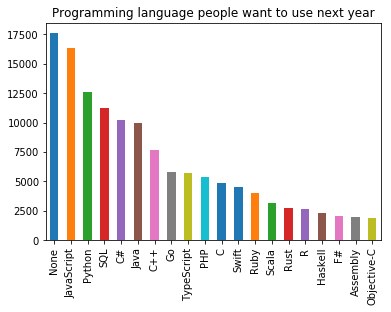

In [150]:
split_wanted_language.head(20).plot(kind='bar')

plt.title('Programming language people want to use next year')

In [77]:
df.HaveWorkedLanguage.value_counts().sort_values(ascending=True).head(20)

C++; Erlang; Python                                                           1
C#; Go; JavaScript; PHP; SQL                                                  1
C; C#; Java; JavaScript; Objective-C; Python; Swift                           1
C#; JavaScript; PHP; R                                                        1
Elixir; Java; JavaScript; PHP; Python; Scala; SQL; TypeScript                 1
PHP; SQL; TypeScript                                                          1
C; C++; C#; Common Lisp; Java; JavaScript; PHP; Python; Scala; SQL; VB.NET    1
C++; C#; Go; Java; JavaScript; PHP; Ruby; SQL                                 1
Assembly; C; C++; C#; Java; JavaScript; Lua; PHP; SQL                         1
C#; Clojure; Go; JavaScript; Python                                           1
Assembly; C; C++; C#; SQL; Swift                                              1
C#; CoffeeScript; Java; JavaScript; Objective-C; Python; Ruby; SQL            1
Elixir; JavaScript; PHP; Ruby; TypeScrip

In [70]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['HaveWorkedLanguage'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'HaveWorkedLanguage': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
props_df = clean_and_plot(df)

TypeError: Empty 'DataFrame': no numeric data to plot